# Books Recommender system using clustering
Collaborative filtering


In [465]:
# Importing necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [466]:
books = pd.read_csv('Books.csv')

C:\Users\kp305\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [467]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [468]:
books.iloc[0]['Image-URL-L']

'http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg'

In [469]:
# !curl "http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg" --out.png
# !curl http://images.amazon.com/images/P/0060973129.01.THUMBZZZ.jpg --output some.jpg

In [470]:
books.shape

(271360, 8)

In [471]:
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

#### Conclution:
Here Image URL columns is important for the poster. So, we will keep it

In [472]:
books = books[['ISBN','Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher','Image-URL-L']]

In [473]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...


In [474]:
# Lets remane some wierd columns name
books.rename(columns={"Book-Title":'title',
                      'Book-Author':'author',
                     "Year-Of-Publication":'year',
                     "Publisher":"publisher",
                     "Image-URL-L":"image_url"},inplace=True)

In [475]:
books.head()

,ISBN,title,author,year,publisher,image_url
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...


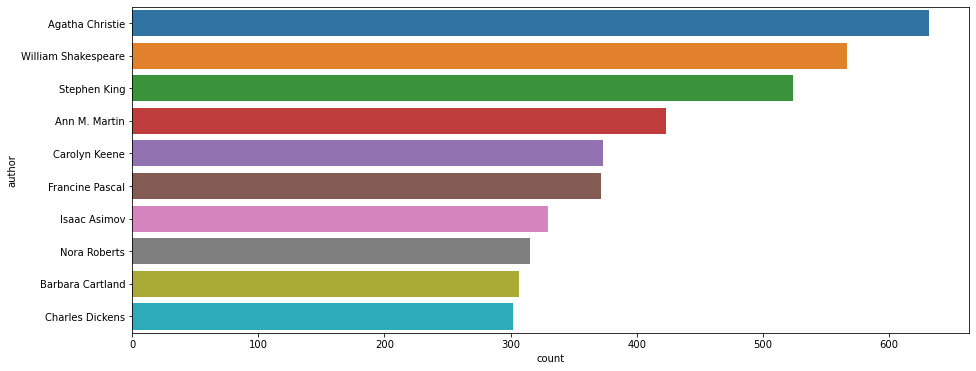

In [476]:
plt.figure(figsize=(15,6))
sns.countplot(y="author", data=books,order=books['author'].value_counts().index[0:10])

In [477]:
# Now load the second dataframe

users = pd.read_csv('Users.csv')

In [478]:
users

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278853,278854,"portland, oregon, usa",NaN
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN


In [479]:
users.isna().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [480]:
numeric_cols = users.select_dtypes(include=['float64', 'int64']).columns
users[numeric_cols] = users[numeric_cols].fillna(users[numeric_cols].mean())

In [481]:
users['Age'] = users['Age'].astype(int)

In [482]:
users.isna().sum()

User-ID     0
Location    0
Age         0
dtype: int64

In [483]:
users

,User-ID,Location,Age
0,1,"nyc, new york, usa",34
1,2,"stockton, california, usa",18
2,3,"moscow, yukon territory, russia",34
3,4,"porto, v.n.gaia, portugal",17
4,5,"farnborough, hants, united kingdom",34
...,...,...,...
278853,278854,"portland, oregon, usa",34
278854,278855,"tacoma, washington, united kingdom",50
278855,278856,"brampton, ontario, canada",34
278856,278857,"knoxville, tennessee, usa",34


In [484]:
# Lets remane some wierd columns name
users.rename(columns={"User-ID":'user_id',
                      'Location':'location',
                     "Age":'age'},inplace=True)

In [485]:
users.head(10)

,user_id,location,age
0,1,"nyc, new york, usa",34
1,2,"stockton, california, usa",18
2,3,"moscow, yukon territory, russia",34
3,4,"porto, v.n.gaia, portugal",17
4,5,"farnborough, hants, united kingdom",34
5,6,"santa monica, california, usa",61
6,7,"washington, dc, usa",34
7,8,"timmins, ontario, canada",34
8,9,"germantown, tennessee, usa",34
9,10,"albacete, wisconsin, spain",26


Text(0.5, 1.0, 'No of readers from each country (Top 10)')

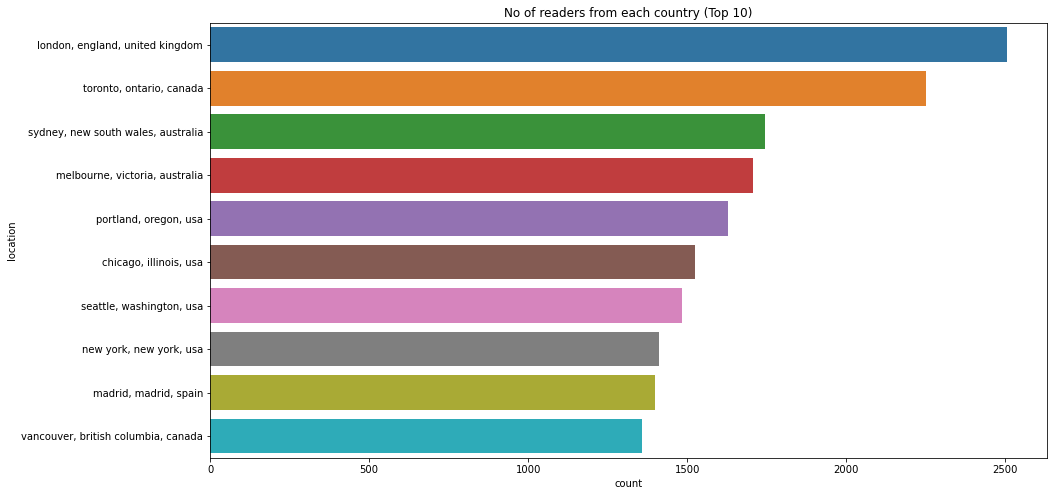

In [487]:
plt.figure(figsize=(15,8))
sns.countplot(y="location", data=users, order=users['location'].value_counts().index[0:10])
plt.title("No of readers from each country (Top 10)")

In [488]:
# Now load the third dataframe

ratings = pd.read_csv('Ratings.csv')

In [489]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [490]:
ratings.shape

(1149780, 3)

In [491]:
# Lets remane some wierd columns name
ratings.rename(columns={"User-ID":'user_id',
                      'Book-Rating':'rating'},inplace=True)

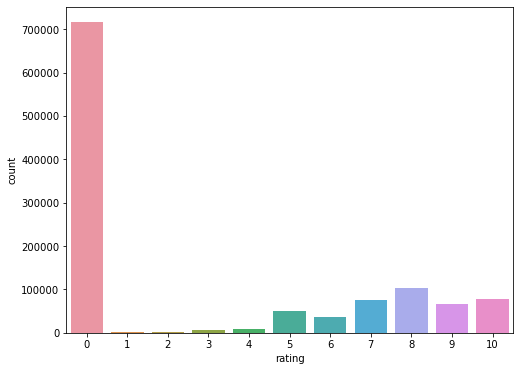

In [492]:
plt.figure(figsize=(8,6))
sns.countplot(x="rating", data=ratings)

In [493]:
ratings.head()

,user_id,ISBN,rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


### Conclution:
Now we have 3 dataframes
- books
- users
- ratings

In [494]:
print(books.shape, users.shape, ratings.shape, sep='\n')



(271360, 6)
(278858, 3)
(1149780, 3)


In [497]:
ratings['user_id'].value_counts()

11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
          ...  
158698        1
17920         1
277135        1
275086        1
187812        1
Name: user_id, Length: 105283, dtype: int64

In [498]:
ratings['user_id'].value_counts().shape

(105283,)

In [499]:
# Lets store users who had at least rated more than 200 books
x = ratings['user_id'].value_counts() > 200

In [500]:
x[x].shape

(899,)

In [501]:
y= x[x].index

In [502]:
y

Int64Index([ 11676, 198711, 153662,  98391,  35859, 212898, 278418,  76352,
            110973, 235105,
            ...
            260183, 155916,  44296,  73681,  59727,  28634, 188951,   9856,
            268622, 274808],
           dtype='int64', length=899)

In [504]:
ratings = ratings[ratings['user_id'].isin(y)]

In [505]:
ratings.head()

,user_id,ISBN,rating
1456,277427,002542730X,10
1457,277427,0026217457,0
1458,277427,003008685X,8
1459,277427,0030615321,0
1460,277427,0060002050,0


In [506]:
ratings.shape

(526356, 3)

In [507]:
# Now join ratings with books

ratings_with_books = ratings.merge(books, on='ISBN')

In [508]:
ratings_with_books.head()

,user_id,ISBN,rating,title,author,year,publisher,image_url
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...


In [509]:
ratings_with_books.shape

(487671, 8)

In [511]:
number_rating = ratings_with_books.groupby('title')['rating'].count().reset_index()

In [512]:
number_rating.head()

,title,rating
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


In [513]:
number_rating.rename(columns={'rating':'num_of_rating'},inplace=True)

In [514]:
number_rating.head()

,title,num_of_rating
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


In [515]:
final_rating = ratings_with_books.merge(number_rating, on='title')

In [516]:
final_rating.head()

,user_id,ISBN,rating,title,author,year,publisher,image_url,num_of_rating
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82


In [517]:
final_rating.shape

(487671, 9)

In [518]:
# Lets take those books which got at least 50 rating of user

final_rating = final_rating[final_rating['num_of_rating'] >= 50]

In [521]:
final_rating.tail()

,user_id,ISBN,rating,title,author,year,publisher,image_url,num_of_rating
236701,255489,0553579983,7,And Then You Die,Iris Johansen,1998,Bantam,http://images.amazon.com/images/P/0553579983.0...,50
236702,256407,0553579983,0,And Then You Die,Iris Johansen,1998,Bantam,http://images.amazon.com/images/P/0553579983.0...,50
236703,257204,0553579983,0,And Then You Die,Iris Johansen,1998,Bantam,http://images.amazon.com/images/P/0553579983.0...,50
236704,261829,0553579983,0,And Then You Die,Iris Johansen,1998,Bantam,http://images.amazon.com/images/P/0553579983.0...,50
236705,273979,0553579983,0,And Then You Die,Iris Johansen,1998,Bantam,http://images.amazon.com/images/P/0553579983.0...,50


In [522]:
final_rating.shape

(61853, 9)

In [523]:
# lets drop the duplicates
final_rating.drop_duplicates(['user_id','title'],inplace=True)

In [524]:
final_rating.shape

(59850, 9)

In [525]:
# Lets create a pivot table
book_pivot = final_rating.pivot_table(columns='user_id', index='title', values= 'rating')

In [526]:
book_pivot

user_id,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84 Charing Cross Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [527]:
book_pivot.shape

(742, 888)

In [528]:
book_pivot.fillna(0, inplace=True)

In [529]:
book_pivot

user_id,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Training Model

In [530]:
from scipy.sparse import csr_matrix

In [531]:
book_sparse = csr_matrix(book_pivot)

In [535]:
type(book_sparse)

scipy.sparse.csr.csr_matrix

In [536]:
# Now import our clustering algoritm which is Nearest Neighbors this is an unsupervised ml algo
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(algorithm= 'brute')

In [537]:
model.fit(book_sparse)

NearestNeighbors(algorithm='brute')

In [538]:
distance, suggestion = model.kneighbors(book_pivot.iloc[237,:].values.reshape(1,-1), n_neighbors=6 )

In [539]:
distance

array([[ 0.        , 68.78953409, 69.5413546 , 72.64296249, 76.83098333,
        77.28518616]])

In [540]:
suggestion

array([[237, 240, 238, 241, 184, 536]], dtype=int64)

In [543]:
book_pivot.iloc[241,:]

user_id
254       9.0
2276      0.0
2766      0.0
2977      0.0
3363      0.0
         ... 
275970    9.0
277427    0.0
277478    0.0
277639    0.0
278418    0.0
Name: Harry Potter and the Sorcerer's Stone (Book 1), Length: 888, dtype: float64

In [547]:
for i in range(len(suggestion)):
    print(book_pivot.index[suggestion[i]])

Index(['Harry Potter and the Chamber of Secrets (Book 2)',
       'Harry Potter and the Prisoner of Azkaban (Book 3)',
       'Harry Potter and the Goblet of Fire (Book 4)',
       'Harry Potter and the Sorcerer's Stone (Book 1)', 'Exclusive',
       'The Cradle Will Fall'],
      dtype='object', name='title')


In [548]:
book_pivot.index[3]

'4 Blondes'

In [549]:
#keeping books name
book_names = book_pivot.index

In [550]:
book_names[2]

'2nd Chance'

In [551]:
np.where(book_pivot.index == '4 Blondes')[0][0]

3

# find url

In [552]:
# final_rating['title'].value_counts()
ids = np.where(final_rating['title'] == "Harry Potter and the Chamber of Secrets (Book 2)")[0][0]

In [554]:
final_rating.iloc[ids]['image_url']

'http://images.amazon.com/images/P/0439064872.01.LZZZZZZZ.jpg'

In [555]:
book_name = []
for book_id in suggestion:
    book_name.append(book_pivot.index[book_id])
    
    

In [556]:
book_name[0]

Index(['Harry Potter and the Chamber of Secrets (Book 2)',
       'Harry Potter and the Prisoner of Azkaban (Book 3)',
       'Harry Potter and the Goblet of Fire (Book 4)',
       'Harry Potter and the Sorcerer's Stone (Book 1)', 'Exclusive',
       'The Cradle Will Fall'],
      dtype='object', name='title')

In [557]:
ids_index = []
for name in book_name[0]: 
    ids = np.where(final_rating['title'] == name)[0][0]
    ids_index.append(ids)

In [558]:
for idx in ids_index:
    url = final_rating.iloc[idx]['image_url']
    print(url)

http://images.amazon.com/images/P/0439064872.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/0439136369.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/0439139597.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/043936213X.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/0446604232.01.LZZZZZZZ.jpg
http://images.amazon.com/images/P/0440115450.01.LZZZZZZZ.jpg


In [559]:
import pickle
pickle.dump(model,open('artifacts/model.pkl','wb'))
pickle.dump(book_names,open('artifacts/book_names.pkl','wb'))
pickle.dump(final_rating,open('artifacts/final_rating.pkl','wb'))
pickle.dump(book_pivot,open('artifacts/book_pivot.pkl','wb'))

# Testing model

In [563]:
def recommend_book(book_name):
    book_id = np.where(book_pivot.index == book_name)[0][0]
    distance, suggestion = model.kneighbors(book_pivot.iloc[book_id,:].values.reshape(1,-1), n_neighbors=6 )
    
    for i in range(len(suggestion)):
            books = book_pivot.index[suggestion[i]]
            for j in books:
                if j == book_name:
                    print(f"You searched '{book_name}'\n")
                    print("The suggestion books are: \n")
                else:
                    print(j)

In [564]:
book_name = "No Safe Place"
recommend_book(book_name)

You searched 'No Safe Place'

The suggestion books are: 

Long After Midnight
A Civil Action
Exclusive
Table For Two
Lake Wobegon days


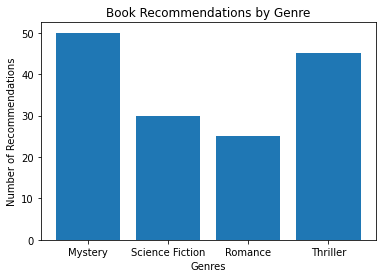

In [565]:
import matplotlib.pyplot as plt

# Example data
genres = ['Mystery', 'Science Fiction', 'Romance', 'Thriller']
recommendations_count = [50, 30, 25, 45]

plt.bar(genres, recommendations_count)
plt.xlabel('Genres')
plt.ylabel('Number of Recommendations')
plt.title('Book Recommendations by Genre')
plt.show()


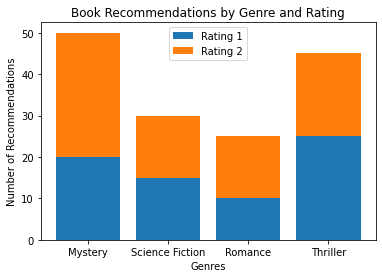

In [566]:
import matplotlib.pyplot as plt

# Example data
genres = ['Mystery', 'Science Fiction', 'Romance', 'Thriller']
ratings_1 = [20, 15, 10, 25]
ratings_2 = [30, 15, 15, 20]

plt.bar(genres, ratings_1, label='Rating 1')
plt.bar(genres, ratings_2, bottom=ratings_1, label='Rating 2')

plt.xlabel('Genres')
plt.ylabel('Number of Recommendations')
plt.title('Book Recommendations by Genre and Rating')
plt.legend()
plt.show()


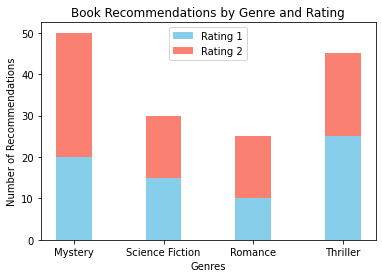

In [567]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
genres = ['Mystery', 'Science Fiction', 'Romance', 'Thriller']
ratings_1 = [20, 15, 10, 25]
ratings_2 = [30, 15, 15, 20]

# Stacked Bar Chart
fig, ax = plt.subplots()

bar_width = 0.4
bar_positions = np.arange(len(genres))

bar1 = ax.bar(bar_positions, ratings_1, bar_width, label='Rating 1', color='skyblue')
bar2 = ax.bar(bar_positions, ratings_2, bar_width, bottom=ratings_1, label='Rating 2', color='salmon')

# Additional customization
ax.set_xlabel('Genres')
ax.set_ylabel('Number of Recommendations')
ax.set_title('Book Recommendations by Genre and Rating')
ax.set_xticks(bar_positions)
ax.set_xticklabels(genres)
ax.legend()

plt.show()


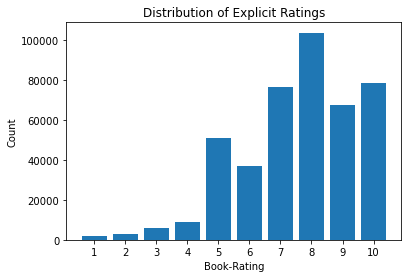

Count of Implicit Rating (0): 716109


In [568]:
import pandas as pd
import matplotlib.pyplot as plt


# Load your dataset
# Replace 'your_dataset.csv' with the path to your dataset
df = pd.read_csv('Ratings.csv')

# Count occurrences of explicit ratings ('1-10')
explicit_ratings_count = df[df['Book-Rating'].isin(range(1, 11))]['Book-Rating'].value_counts()

# Add count of implicit rating ('0') if needed
implicit_rating_count = len(df[df['Book-Rating'] == 0])

# Plot the distribution of explicit ratings
plt.bar(explicit_ratings_count.index, explicit_ratings_count.values)
plt.xlabel('Book-Rating')
plt.ylabel('Count')
plt.title('Distribution of Explicit Ratings')
plt.xticks(range(1, 11))  # Ensure x-axis ticks cover ratings from 1 to 10
plt.show()
#logout = go.logout(title="count of ratings",xaxis={'title':'Rating'},yaxis={'title':'count'})
#go.figure(layout)

# Display count of implicit rating
print("Count of Implicit Rating (0):", implicit_rating_count)